In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a ditionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' means the input data of data
data.data.shape

# 569 samples with 30 features

(569, 30)

In [7]:
# targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape
# also have 569 targets

(569,)

In [10]:
# name of features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                   test_size=0.33)

N, D = X_train.shape

In [13]:
# tensorflow
# using sigmoid for activation function (good performance with boolean type data)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
"""
Also can do like this

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))
"""

"\nAlso can do like this\n\nmodel = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))\n"

In [15]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 178.3133 - accuracy: 0.6299 - val_loss: 191.1025 - val_accuracy: 0.6223
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 166.5056 - accuracy: 0.6299 - val_loss: 177.6079 - val_accuracy: 0.6223
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 154.7338 - accuracy: 0.6299 - val_loss: 164.2228 - val_accuracy: 0.6223
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 142.6343 - accuracy: 0.6299 - val_loss: 151.1791 - val_accuracy: 0.6223
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 130.8275 - accuracy: 0.6299 - val_loss: 138.2111 - val_accuracy: 0.6223
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 118.8929 - accuracy: 0.6299 - val_loss: 125.2756 - val_accuracy: 0.6223
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 106.9994 - accuracy: 0.6299 - val_loss: 112.2669 - val_ac

12/12 [==============================] - 0s 3ms/step - loss: 1.4872 - accuracy: 0.6509 - val_loss: 1.4580 - val_accuracy: 0.6543
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4389 - accuracy: 0.6509 - val_loss: 1.4320 - val_accuracy: 0.6489
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3896 - accuracy: 0.6745 - val_loss: 1.3684 - val_accuracy: 0.6755
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3532 - accuracy: 0.6824 - val_loss: 1.3401 - val_accuracy: 0.6809
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 1.3124 - accuracy: 0.6877 - val_loss: 1.3051 - val_accuracy: 0.6862
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2753 - accuracy: 0.6903 - val_loss: 1.2832 - val_accuracy: 0.6862
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2485 - accuracy: 0.6903 - val_loss: 1.2273 - val_accuracy: 0.7234
Epoch 65/100
12/12 

In [17]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 922us/step - loss: 0.7088 - accuracy: 0.8084
Train score: [0.708827555179596, 0.808398962020874]
6/6 [==============================] - 0s 1ms/step - loss: 0.7236 - accuracy: 0.8245
Test score: [0.7236453890800476, 0.8244680762290955]


### ploting

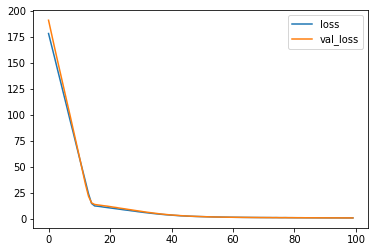

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

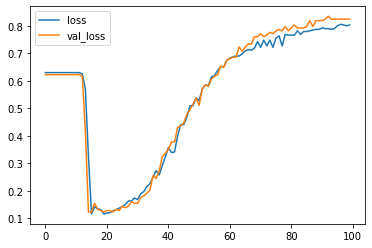

In [19]:
plt.plot(r.history['accuracy'], label='loss')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()

### Makin gPredictions

In [26]:
# Make predictions
p = model.predict(X_test)
print(p) 
# they are outputs of the sigmoid, interrpreted as probabilities p(y = 1 | x)

[[9.3036324e-06]
 [9.2165238e-01]
 [9.6742815e-01]
 [9.6900183e-01]
 [6.5723723e-01]
 [4.4076252e-04]
 [9.9045122e-01]
 [3.6822208e-08]
 [9.0293944e-01]
 [2.1680541e-12]
 [2.6386617e-08]
 [9.9187273e-01]
 [9.8860300e-01]
 [9.3353921e-01]
 [7.1280390e-09]
 [3.2270086e-01]
 [9.5073247e-01]
 [9.9530560e-01]
 [5.6022790e-04]
 [6.8534881e-01]
 [9.8798126e-01]
 [8.2659638e-03]
 [9.9943930e-01]
 [4.0022692e-01]
 [9.6332842e-01]
 [1.6863136e-04]
 [9.6446711e-01]
 [9.8898065e-01]
 [1.9496119e-02]
 [9.8964804e-01]
 [9.6180409e-01]
 [9.9605823e-01]
 [9.8515701e-01]
 [9.1816046e-21]
 [9.8778534e-01]
 [3.2509509e-11]
 [3.7893739e-01]
 [9.9074793e-01]
 [4.2280767e-02]
 [9.9996734e-01]
 [9.4963795e-01]
 [3.7727619e-03]
 [9.1656608e-18]
 [7.7658516e-01]
 [9.2394853e-01]
 [2.8354338e-05]
 [7.5197679e-01]
 [9.7583276e-01]
 [9.9179560e-01]
 [9.9960202e-01]
 [7.9735568e-05]
 [4.6995467e-07]
 [9.9265689e-01]
 [8.4329349e-01]
 [8.8901466e-01]
 [1.6877034e-01]
 [9.4442058e-01]
 [7.5234964e-02]
 [9.7588028e-1

In [27]:
# Round to get the acutal predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size(N,1)

import numpy as np
p = np.round(p).flatten()
print(p)

[0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]


In [31]:
print("Manually calculated accuracy:", np.mean(p == y_test))
print("-"*40)
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.824468085106383
----------------------------------------
6/6 [==============================] - 0s 702us/step - loss: 0.7236 - accuracy: 0.8245
Evaluate output: [0.7236453890800476, 0.8244680762290955]
